In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [35]:
df=pd.read_csv("Sugarcane production.csv")

In [36]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# Data Cleaning

In [37]:
#CORRECTING COLUMNS DATA 

df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [38]:
df.sample(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
12,12,Argentina,South America,21990823,494237,331699,66297.5
97,97,Spain,Europe,394,8,9,43596.5
86,86,Benin,Africa,12017,1058,598,20095.3
84,84,Afghanistan,Asia,17364,55,1333,13026.3
67,67,Guinea,Africa,304975,25664,5683,53668.4


In [39]:
#CHECKING AND DROPPING NULL VALUES

df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [40]:
df=df.dropna().reset_index()

In [41]:
df.sample(5)

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
2,2,2,China,Asia,123059739,88287,1675215,73459.1
94,94,94,Dominica,North America,4855,68099,244,19914.4
78,78,78,Rwanda,Africa,93823,7818,1103,8506.3
57,57,57,Senegal,Africa,696992,44321,5902,118085.3
86,86,86,Benin,Africa,12017,1058,598,20095.3


In [43]:
#REMOVING XTRA COLUMNS

df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [44]:
df


,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [50]:
df.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"Production per Person(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare":"Yield(Kg/Hectare"},inplace=True)

In [51]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [52]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production per Person(Kg)    object
Acreage(Hectare)             object
Yield (Kg / Hectare)         object
dtype: object

In [64]:
#CORRECTING DATA TYPES OF COLUMNS 

df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["Production per Person(Kg)"]=df["Production per Person(Kg)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].astype(float)


In [67]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production per Person(Kg)    float64
Acreage(Hectare)             float64
Yield (Kg / Hectare)         float64
dtype: object

In [68]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production per Person(Kg)    101
Acreage(Hectare)             101
Yield (Kg / Hectare)         102
dtype: int64

# how many countries produce sugarcane from each continent

In [69]:
df


,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


In [73]:
df["Continent"].value_counts()


Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

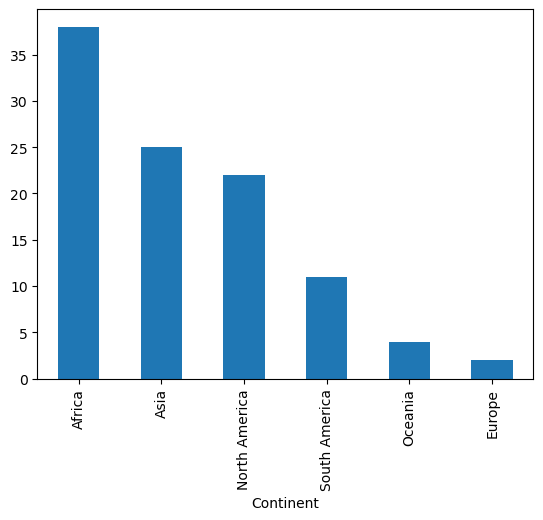

In [74]:
df["Continent"].value_counts().plot(kind="bar")

C:\Users\priyanshu gairola\AppData\Local\Temp\ipykernel_15068\3311416819.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\priyanshu gairola\AppData\Local\Temp\ipykernel_15068\3311416819.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production per Per

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

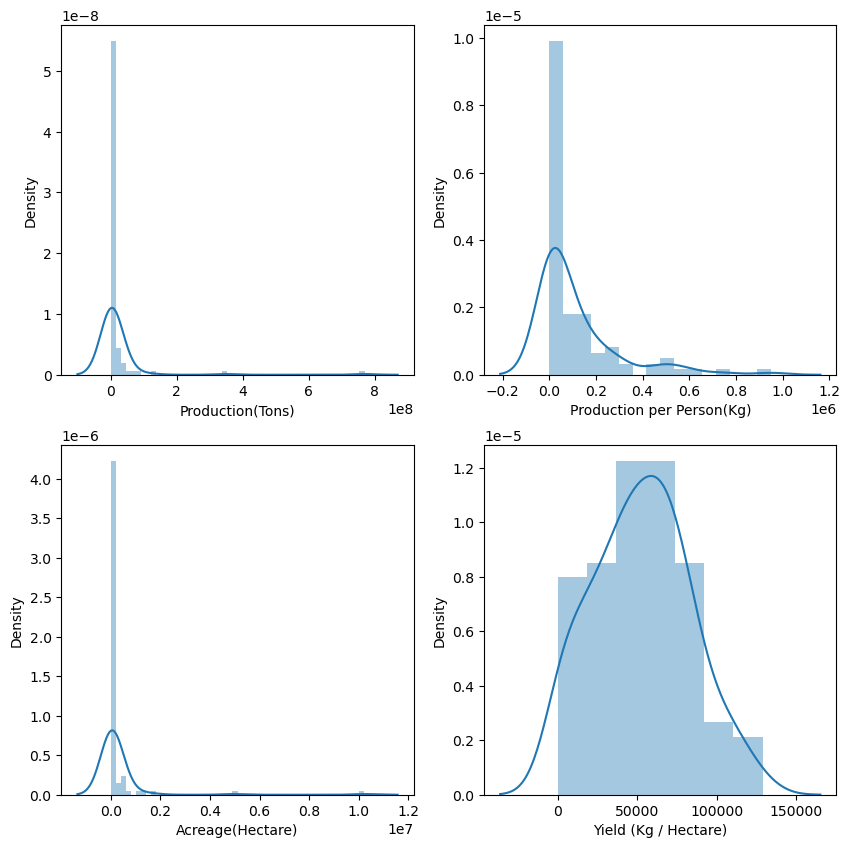

In [82]:
# distribution subplotss

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])

plt.subplot(2,2,2)
sns.distplot(df["Production per Person(Kg)"])

plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])

plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])

# WHICH country produce MAXM sugarcane 

In [85]:
    df_new=df[["Country","Production(Tons)"]].set_index("Country")
    df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [86]:
df_new["percentage"]=(df_new["Production(Tons)"]/df_new["Production(Tons)"].sum())*100

In [87]:
df_new

,Production(Tons),percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='percentage'>

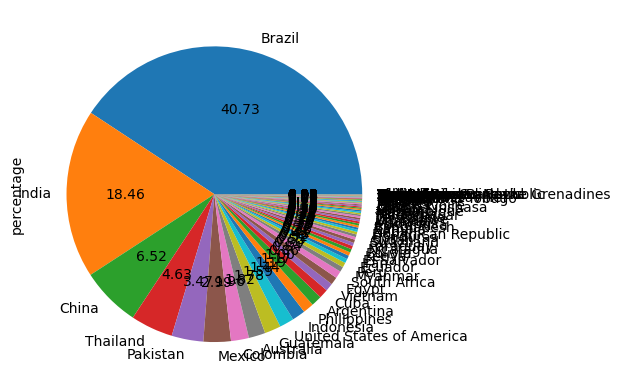

In [90]:
df_new["percentage"].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

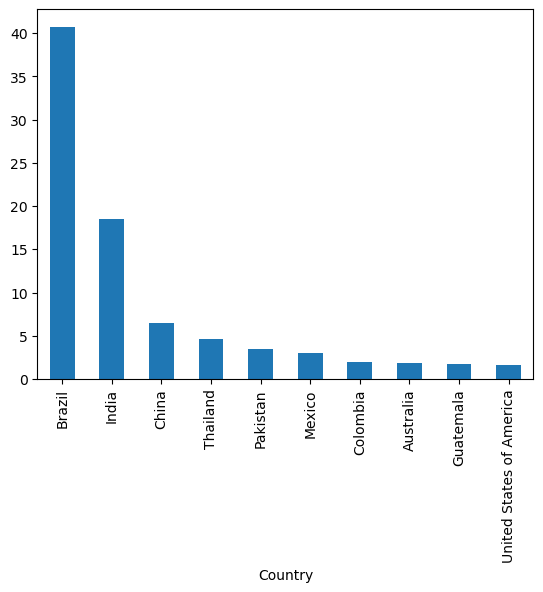

In [94]:
df_new["percentage"].head(10).plot(kind="bar")

<Axes: xlabel='Country'>

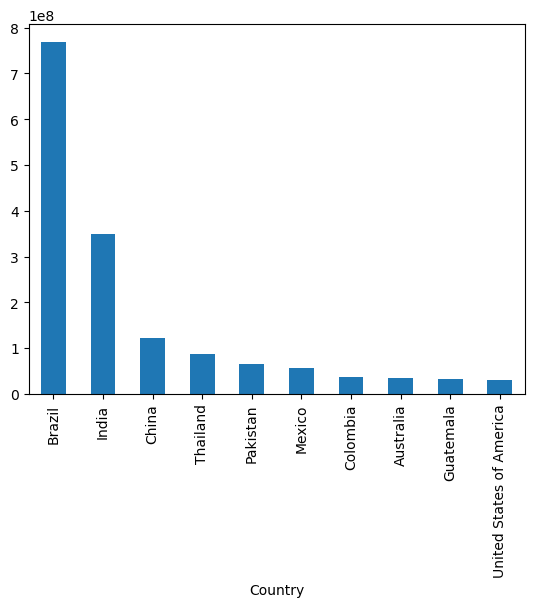

In [95]:
df_new["Production(Tons)"].head(10).plot(kind="bar")

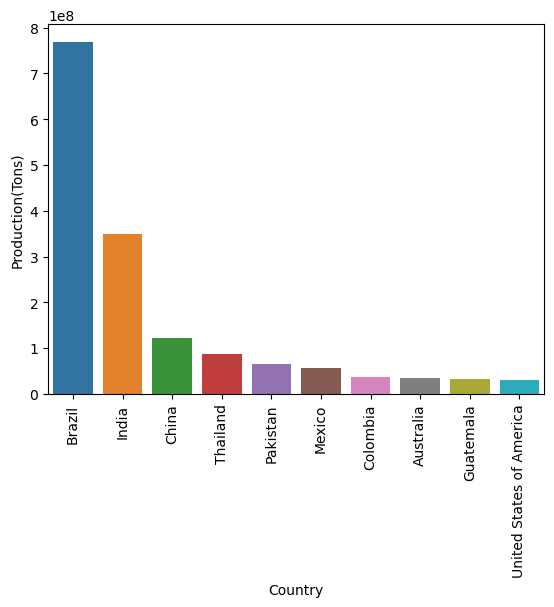

In [102]:
ax=sns.barplot(data=df.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)  #for better readaboility so that it not overlaps
plt.show()

# which country has highest land 

In [119]:
df

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


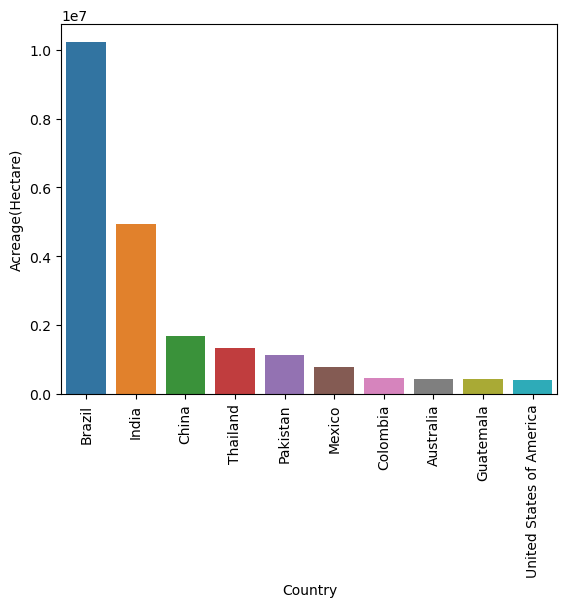

In [127]:
df_acre=df[["Country","Acreage(Hectare)"]]

df_acre=df_acre.sort_values("Acreage(Hectare)",ascending=False)


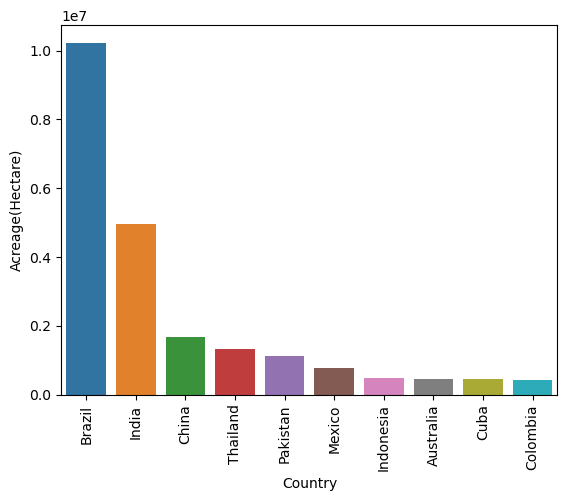

In [128]:
ax=sns.barplot(data=df_acre.head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)  #for better readaboility so that it not overlaps
plt.show()

# which country has highest yiels per hectare

In [118]:
df

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


In [111]:
df_yield=df[["Country","Yield (Kg / Hectare)"]]
df_yield=df_yield.sort_values("Yield (Kg / Hectare)",ascending=False)
df_yield

,Country,Yield (Kg / Hectare)
8,Guatemala,129049.3
57,Senegal,118085.3
15,Egypt,115030.6
18,Peru,112120.2
40,Malawi,107629.5
...,...,...
88,Saint Lucia,80.0
55,Trinidad and Tobago,54.0
99,Singapore,25.0
87,Iraq,20.0


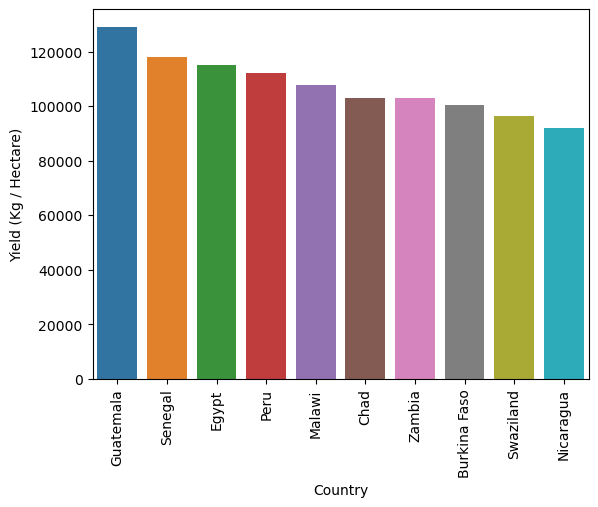

In [129]:
ax=sns.barplot(data=df_yield.head(10),x="Country",y="Yield (Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)  #for better readaboility so that it not overlaps
plt.show()

# which country has highest production per kg

In [130]:
df

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


In [132]:
df_per_kg=df[["Country","Production per Person(Kg)"]]
df_per_kg=df_per_kg.sort_values("Production per Person(Kg)",ascending =False)
df_per_kg

,Country,Production per Person(Kg)
25,Paraguay,951087.0
6,Colombia,740075.0
55,Trinidad and Tobago,597066.0
42,Panama,581814.0
51,Jamaica,521254.0
...,...,...
98,Lebanon,16.0
99,Singapore,9.0
97,Spain,8.0
100,Samoa,6.0


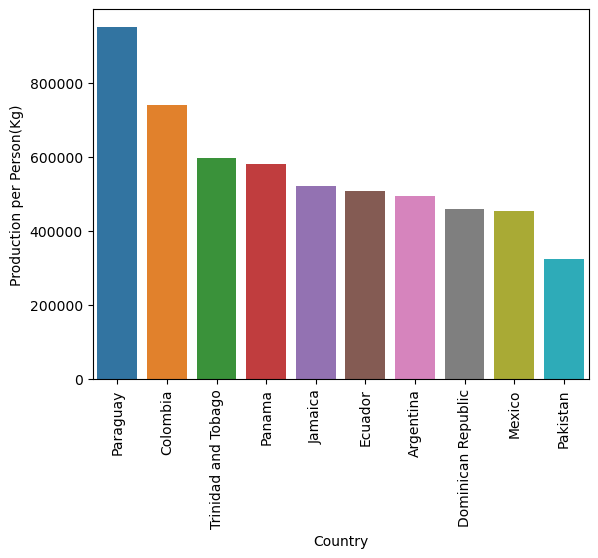

In [133]:
ax=sns.barplot(data=df_per_kg.head(10),x="Country",y="Production per Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)  #for better readaboility so that it not overlaps
plt.show()

# Correalation

In [134]:
df

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


In [157]:
numeric_df = df.select_dtypes(include=[float, int])

# Compute correlation
correlation_matrix = numeric_df.corr()
# Display the correlation matrix
print(correlation_matrix)

                           Production(Tons)  Production per Person(Kg)  \
Production(Tons)                   1.000000                   0.015000   
Production per Person(Kg)          0.015000                   1.000000   
Acreage(Hectare)                   0.997550                   0.012557   
Yield (Kg / Hectare)               0.132812                   0.017999   

                           Acreage(Hectare)  Yield (Kg / Hectare)  
Production(Tons)                   0.997550              0.132812  
Production per Person(Kg)          0.012557              0.017999  
Acreage(Hectare)                   1.000000              0.113433  
Yield (Kg / Hectare)               0.113433              1.000000  


# Do countries with highest land produce more sugarcane

<Axes: >

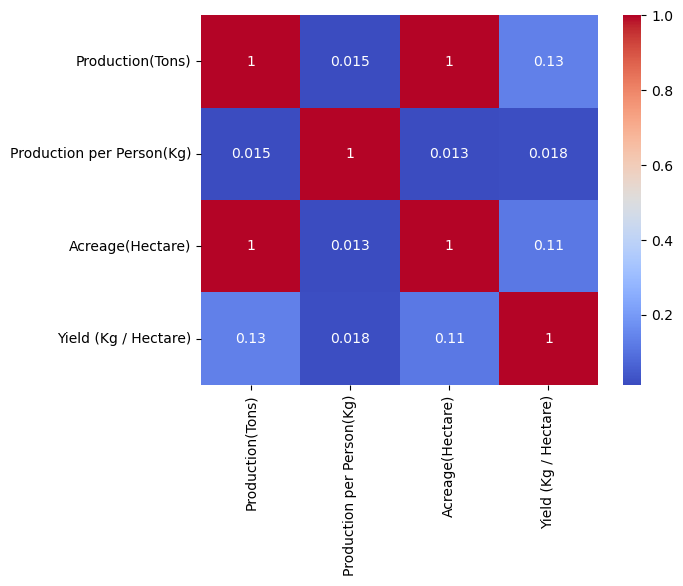

In [160]:
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

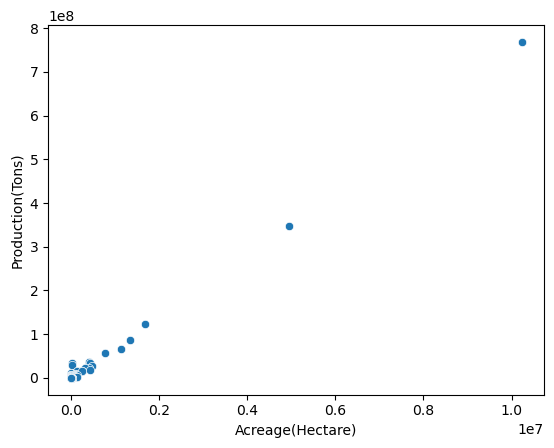

In [139]:
sns.scatterplot(data=df,x="Acreage(Hectare)",y="Production(Tons)")

# Do countries which yield more sugarcane / hectare   produce more sugarcane

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production(Tons)'>

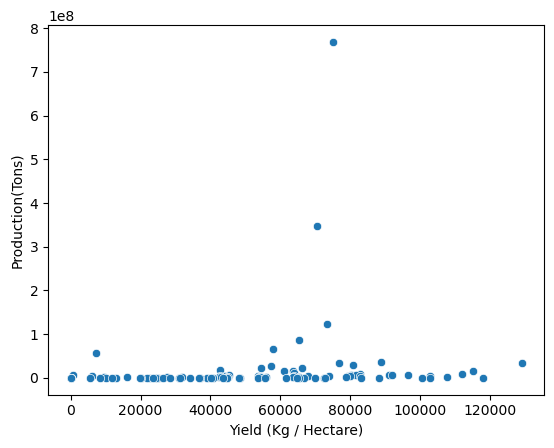

In [140]:
sns.scatterplot(data=df,x="Yield (Kg / Hectare)",y="Production(Tons)")

# analysis for Continents

In [142]:
df_continent=df.groupby("Continent").sum()
df_continent

,Country,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


# Which continent produces maximum sugarcane

In [156]:
df_continent.sort_values("Production(Tons)",ascending=False)


,Country,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield (Kg / Hectare),Total Countries
Continent,,,,,,
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2


# Correlation for continents 

In [161]:
numeric_data = df_continent.select_dtypes(include=[float, int])

# Compute correlation
corr_matrix = numeric_data.corr()
# Display the correlation matrix
print(corr_matrix)

                           Production(Tons)  Production per Person(Kg)  \
Production(Tons)                   1.000000                   0.522211   
Production per Person(Kg)          0.522211                   1.000000   
Acreage(Hectare)                   0.994897                   0.463215   
Yield (Kg / Hectare)               0.091201                   0.542961   
Total Countries                    0.109244                   0.540086   

                           Acreage(Hectare)  Yield (Kg / Hectare)  \
Production(Tons)                   0.994897              0.091201   
Production per Person(Kg)          0.463215              0.542961   
Acreage(Hectare)                   1.000000              0.111166   
Yield (Kg / Hectare)               0.111166              1.000000   
Total Countries                    0.132817              0.989712   

                           Total Countries  
Production(Tons)                  0.109244  
Production per Person(Kg)         0.540086  
Acrea

<Axes: >

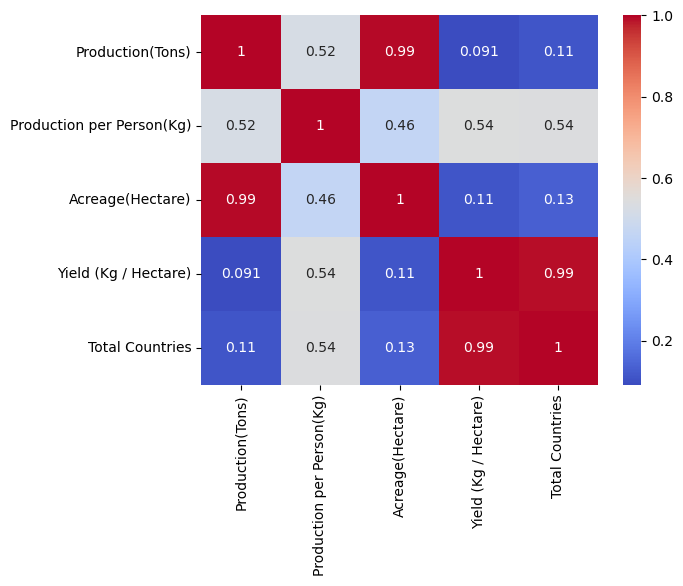

In [162]:
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

# Do no of countries in continent effect production

In [149]:
# adding column of total countries

df_continent["Total Countries"]=df.groupby("Continent").count()["Country"]
df_continent

,Country,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield (Kg / Hectare),Total Countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


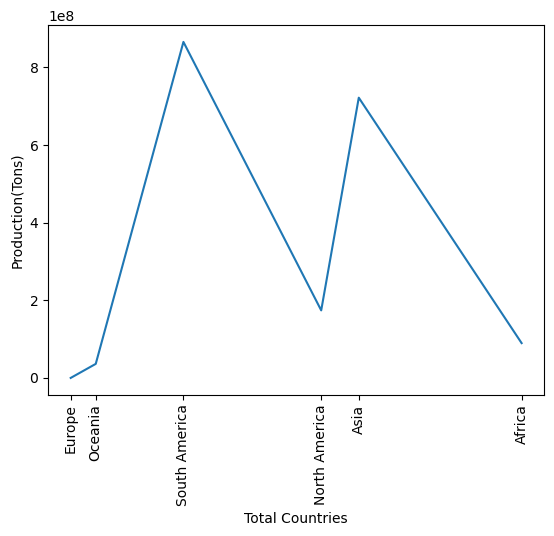

In [154]:
continent_names=df_continent.index.to_list()

sns.lineplot(data=df_continent,x="Total Countries",y="Production(Tons)")

plt.xticks(df_continent["Total Countries"],continent_names,rotation=90)
plt.show()

# Production distribution by Continent

<Axes: ylabel='Production(Tons)'>

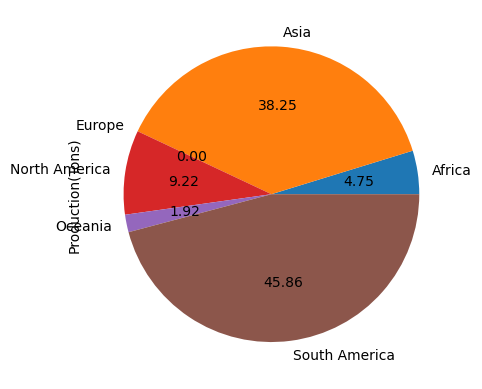

In [155]:
df_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f")